In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e22/sample_submission.csv
/kaggle/input/playground-series-s3e22/train.csv
/kaggle/input/playground-series-s3e22/test.csv


In [2]:
train_horses=pd.read_csv('/kaggle/input/playground-series-s3e22/train.csv')
test_horses=pd.read_csv('/kaggle/input/playground-series-s3e22/test.csv')

In [3]:
train_horses.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [4]:
test_horses.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [5]:
train_horses.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

# Preprocessing

In [6]:
missing_values=train_horses.isnull().sum()

In [7]:
# how many total missing values do we have?
total_cells = np.product(train_horses.shape)
total_missing = missing_values.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

2.1359765461398856


<Axes: >

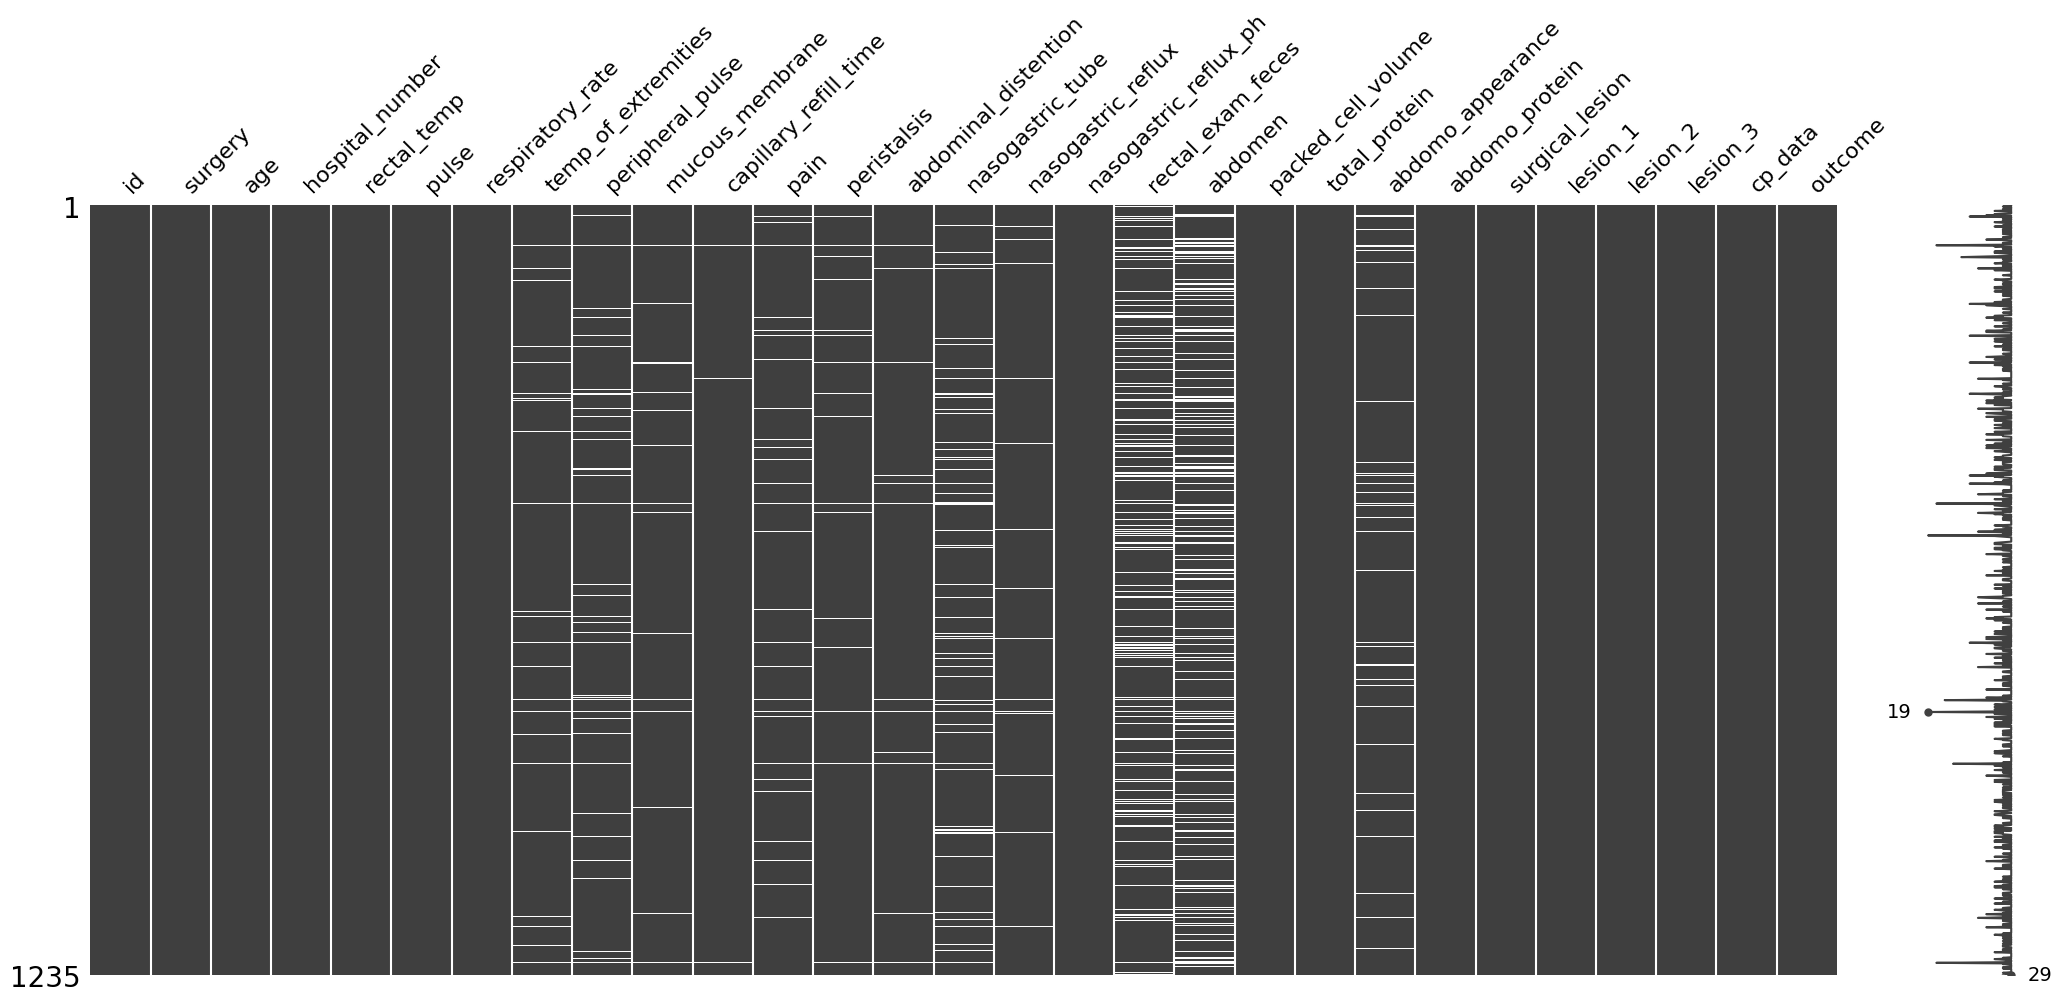

In [8]:
import missingno as msno
msno.matrix(train_horses)

<Axes: >

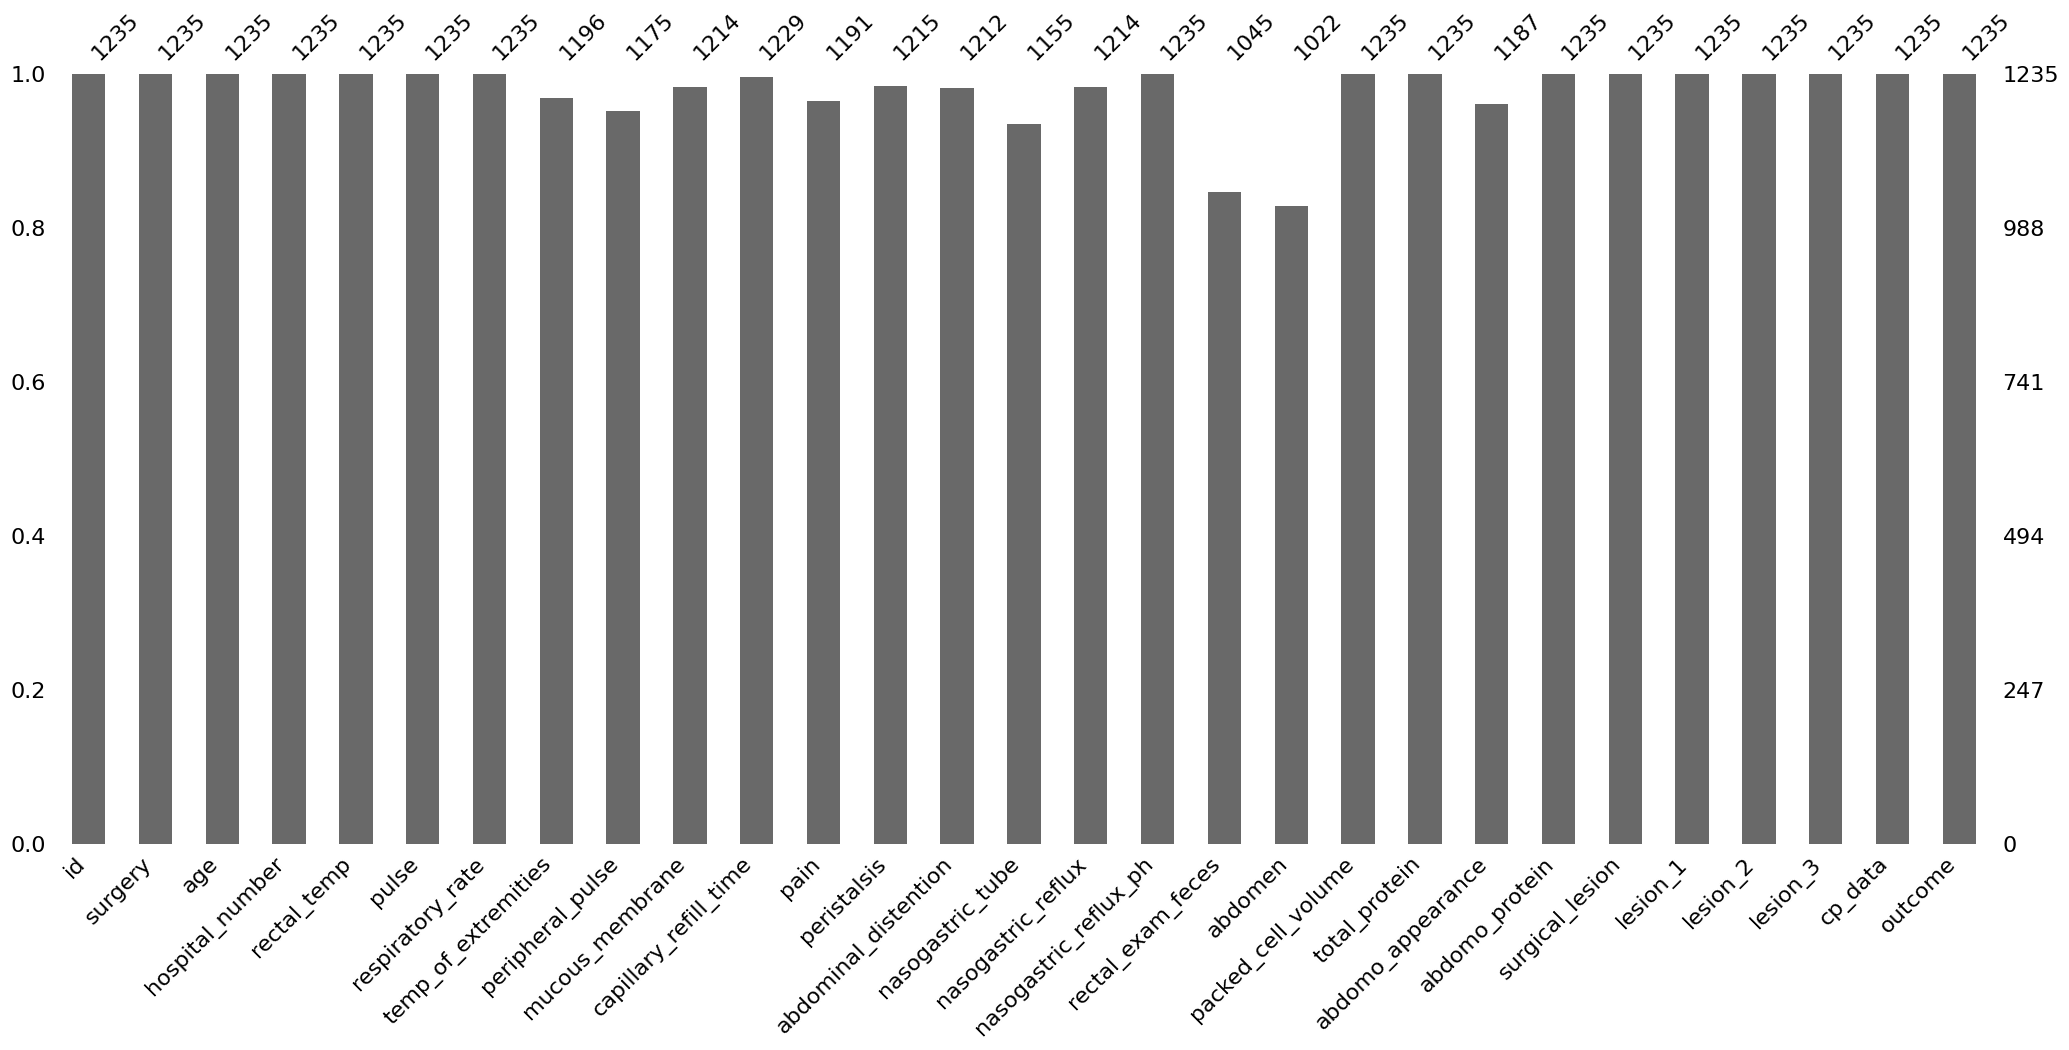

In [9]:
msno.bar(train_horses)

<Axes: >

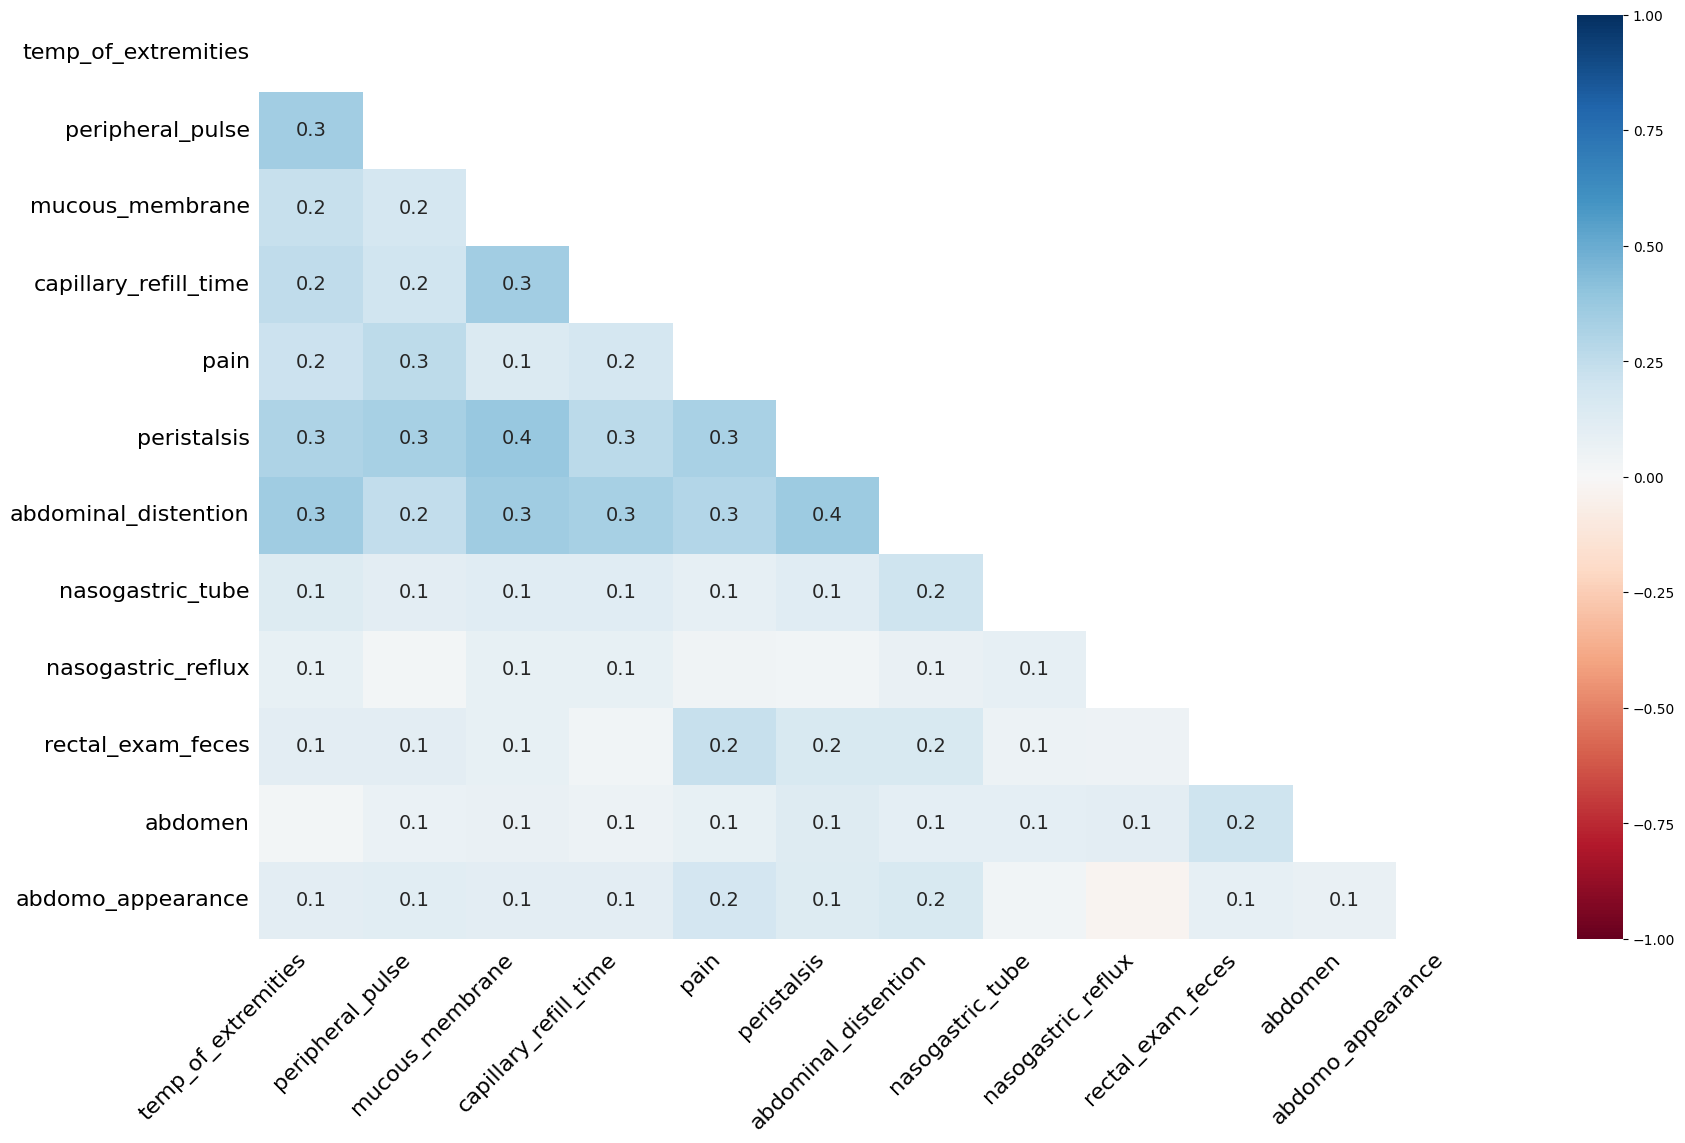

In [10]:
msno.heatmap(train_horses)

In [11]:
# Separate columns into numeric and categorical
numeric_cols = []
categorical_cols = []

for column in train_horses.columns:
    if train_horses[column].dtype in ['int64', 'float64']:
        numeric_cols.append(column)
    else:
        categorical_cols.append(column)

# Create new DataFrames with the separated columns
numeric_horses = train_horses[numeric_cols]
categorical_horses = train_horses[categorical_cols]

# Display the resulting DataFrames
print("Numeric Columns:")
print(numeric_horses)

print("\nCategorical Columns:")
print(categorical_horses)


Numeric Columns:
        id  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        0           530001         38.1  132.0              24.0   
1        1           533836         37.5   88.0              12.0   
2        2           529812         38.3  120.0              28.0   
3        3          5262541         37.1   72.0              30.0   
4        4          5299629         38.0   52.0              48.0   
...    ...              ...          ...    ...               ...   
1230  1230           535246         38.5  129.0              48.0   
1231  1231           528570         37.5   60.0              50.0   
1232  1232           529685         37.5   84.0              40.0   
1233  1233           534784         38.1   70.0              16.0   
1234  1234           528548         38.1   54.0              36.0   

      nasogastric_reflux_ph  packed_cell_volume  total_protein  \
0                       6.5                57.0            8.5   
1                     

In [12]:
cat_cols=categorical_horses.columns

In [13]:
for cols in cat_cols:
    train_horses[cols].fillna('Unknown', inplace=True)

In [14]:
train_horses['temp_of_extremities'].replace({'normal':1,'warm':2,'cool':3,'cold':4,
                                             'Unknown':0}, inplace=True)
train_horses['peripheral_pulse'].replace({'normal':1,'increased':2,'reduced':3,'absent':4,
                                             'Unknown':0}, inplace=True)
train_horses['mucous_membrane'].replace({'normal_pink':1,'bright_pink':2,'pale_pink':3,
                                         'pale_cyanotic':4,'bright_red':5,'dark_cyanotic':6,
                                             'Unknown':0}, inplace=True)
train_horses['capillary_refill_time'].replace({'less_3_sec':1,'more_3_sec':2,
                                               'Unknown':0}, inplace=True)
train_horses['pain'].replace({'alert':1,'depressed':2,'mild_pain':3,
                                         'severe_pain':4,'extreme_pain':5,'Unknown':0}, inplace=True)
train_horses['peristalsis'].replace({'hypermotile':1,'normal':2,'hypomotile':3,'absent':4,
                                      'Unknown':0}, inplace=True)
train_horses['abdominal_distention'].replace({'none':1,'slight':2,'moderate':3,'severe':4,
                                               'Unknown':0}, inplace=True)
train_horses['nasogastric_tube'].replace({'none':1,'slight':2,'significant':3,
                                               'Unknown':0}, inplace=True)
train_horses['nasogastric_reflux'].replace({'none':1,'slight':2,'less_1_liter':2,'more_1_liter':3,
                                               'Unknown':0}, inplace=True)
train_horses['rectal_exam_feces'].replace({'normal':1,'increased':2,'decreased':3,'absent':4,
                                               'Unknown':0}, inplace=True)
train_horses['abdomen'].replace({'normal':1,'other':2,'firm':3,'distend_small':4,'distend_large':5,
                                               'Unknown':0}, inplace=True)
train_horses['abdomo_appearance'].replace({'clear':1,'cloudy':2,'serosanguious':3,'Unknown':0}, inplace=True)

In [15]:
train_horses.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,3,3,6,...,57.0,8.5,3,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,3,1,4,...,33.0,64.0,3,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,3,3,3,...,37.0,6.4,3,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,4,3,3,...,53.0,7.0,2,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,1,1,1,...,47.0,7.3,2,2.6,no,0,0,0,yes,lived


In [16]:
few_cat_cols=['surgery', 'age', 'surgical_lesion', 'cp_data', 'outcome']
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for cols in few_cat_cols:
    # Perform label encoding on a specific column, for example, 'Category_A'
    train_horses[cols] = label_encoder.fit_transform(train_horses[cols])


In [17]:
# Drop all rows containing 'A' in the 'Column_Name' column
train_horses = train_horses[train_horses['pain'] != 'slight']
train_horses = train_horses[train_horses['rectal_exam_feces'] != 'serosanguious']
train_horses = train_horses[train_horses['peristalsis'] != 'distend_small']

# Reset the index if needed
train_horses.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
train_horses.head()


,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,1,0,530001,38.1,132.0,24.0,3,3,6,...,57.0,8.5,3,3.4,1,2209,0,0,0,0
1,1,1,0,533836,37.5,88.0,12.0,3,1,4,...,33.0,64.0,3,2.0,1,2208,0,0,0,1
2,2,1,0,529812,38.3,120.0,28.0,3,3,3,...,37.0,6.4,3,3.4,1,5124,0,0,0,2
3,3,1,0,5262541,37.1,72.0,30.0,4,3,3,...,53.0,7.0,2,3.9,1,2208,0,0,1,2
4,4,0,0,5299629,38.0,52.0,48.0,1,1,1,...,47.0,7.3,2,2.6,0,0,0,0,1,2


In [ ]:
X=train_horses.copy()

# Working on the Test Data

In [17]:
test_horses.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       35
peripheral_pulse          47
mucous_membrane           13
capillary_refill_time      6
pain                      29
peristalsis               19
abdominal_distention      22
nasogastric_tube          64
nasogastric_reflux        14
nasogastric_reflux_ph      0
rectal_exam_feces        125
abdomen                  154
packed_cell_volume         0
total_protein              0
abdomo_appearance         31
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [18]:
# Separate columns into numeric and categorical
test_numeric_cols = []
test_categorical_cols = []

for column in test_horses.columns:
    if test_horses[column].dtype in ['int64', 'float64']:
        test_numeric_cols.append(column)
    else:
        test_categorical_cols.append(column)

# Create new DataFrames with the separated columns
test_numeric_horses = test_horses[test_numeric_cols]
test_categorical_horses = test_horses[test_categorical_cols]

# Display the resulting DataFrames
print("Numeric Columns:")
print(test_numeric_horses)

print("\nCategorical Columns:")
print(test_categorical_horses)


Numeric Columns:
       id  hospital_number  rectal_temp  pulse  respiratory_rate  \
0    1235           534053         38.6   40.0              20.0   
1    1236           528469         38.2  112.0              48.0   
2    1237           528178         37.7   66.0              12.0   
3    1238           534784         37.1   88.0              20.0   
4    1239           529840         38.3   50.0              12.0   
..    ...              ...          ...    ...               ...   
819  2054           529461         40.3  114.0              36.0   
820  2055           535338         37.2  100.0              20.0   
821  2056           529640         39.2  132.0              12.0   
822  2057          5287179         38.3   54.0              66.0   
823  2058           528461         38.1   66.0              12.0   

     nasogastric_reflux_ph  packed_cell_volume  total_protein  abdomo_protein  \
0                      7.0                42.0            7.5             2.3   
1   

In [19]:
test_cat_cols=test_categorical_horses.columns

In [20]:
for col in test_cat_cols:
    test_horses[col].fillna('Unknown', inplace=True)

In [21]:
test_horses['temp_of_extremities'].replace({'normal':1,'warm':2,'cool':3,'cold':4,
                                             'Unknown':0}, inplace=True)
test_horses['peripheral_pulse'].replace({'normal':1,'increased':2,'reduced':3,'absent':4,
                                             'Unknown':0}, inplace=True)
test_horses['mucous_membrane'].replace({'normal_pink':1,'bright_pink':2,'pale_pink':3,
                                         'pale_cyanotic':4,'bright_red':5,'dark_cyanotic':6,
                                             'Unknown':0}, inplace=True)
test_horses['capillary_refill_time'].replace({'less_3_sec':1,'more_3_sec':2,
                                               'Unknown':0}, inplace=True)
test_horses['pain'].replace({'alert':1,'depressed':2,'mild_pain':3,
                                         'severe_pain':4,'extreme_pain':5,'Unknown':0}, inplace=True)
test_horses['peristalsis'].replace({'hypermotile':1,'normal':2,'hypomotile':3,'absent':4,
                                      'Unknown':0}, inplace=True)
test_horses['abdominal_distention'].replace({'none':1,'slight':2,'moderate':3,'severe':4,
                                               'Unknown':0}, inplace=True)
test_horses['nasogastric_tube'].replace({'none':1,'slight':2,'significant':3,
                                               'Unknown':0}, inplace=True)
test_horses['nasogastric_reflux'].replace({'none':1,'slight':2,'less_1_liter':2,'more_1_liter':3,
                                               'Unknown':0}, inplace=True)
test_horses['rectal_exam_feces'].replace({'normal':1,'increased':2,'decreased':3,'absent':4,
                                               'Unknown':0}, inplace=True)
test_horses['abdomen'].replace({'normal':1,'other':2,'firm':3,'distend_small':4,'distend_large':5,
                                               'Unknown':0}, inplace=True)
test_horses['abdomo_appearance'].replace({'clear':1,'cloudy':2,'serosanguious':3,'Unknown':0}, inplace=True)

In [22]:
test_few_cat_cols=['surgery', 'age', 'surgical_lesion', 'cp_data']
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for cols in test_few_cat_cols:
    # Perform label encoding on a specific column, for example, 'Category_A'
    test_horses[cols] = label_encoder.fit_transform(test_horses[cols])


In [23]:
# Drop all rows containing 'A' in the 'Column_Name' column
test_horses = test_horses[test_horses['pain'] != 'moderate']

# Reset the index if needed
test_horses.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
test_horses.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,0,0,534053,38.6,40.0,20.0,1,1,1,...,4,42.0,7.5,1,2.3,0,0,0,0,0
1,1236,1,0,528469,38.2,112.0,48.0,3,3,2,...,4,44.0,6.0,3,2.6,0,2208,0,0,1
2,1237,1,0,528178,37.7,66.0,12.0,3,1,5,...,4,31.5,6.0,2,1.6,1,2205,0,0,1
3,1238,0,0,534784,37.1,88.0,20.0,3,3,4,...,5,75.0,81.0,0,1.0,1,1400,0,0,0
4,1239,1,0,529840,38.3,50.0,12.0,0,1,2,...,4,37.0,6.8,2,2.6,1,2208,0,0,1


# Model Building

In [24]:
pip install pycaret

  Using cached pycaret-3.1.0-py3-none-any.whl (483 kB)
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached pyod-1.1.0.tar.gz (153 kB)
  Preparing metadata (setup.py) ... done
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached plotly_resampler-0.9.1-py3-none-any.whl (73 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 56.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 51.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 75.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [26]:
from pycaret.classification import *

setup(data=train_horses, target='outcome')
compare_models()

,Description,Value
0,Session id,7322
1,Target,outcome
2,Target type,Multiclass
3,Original data shape,"(1232, 29)"
4,Transformed data shape,"(1232, 44)"
5,Transformed train set shape,"(862, 44)"
6,Transformed test set shape,"(370, 44)"
7,Numeric features,24
8,Categorical features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.7100,0.8504,0.7100,0.7179,0.7078,0.5390,0.5443,0.3940
catboost,CatBoost Classifier,0.7089,0.8506,0.7089,0.7148,0.7046,0.5352,0.5410,3.5840
gbc,Gradient Boosting Classifier,0.7008,0.8457,0.7008,0.7082,0.6970,0.5232,0.5296,0.4570
rf,Random Forest Classifier,0.6984,0.8534,0.6984,0.7128,0.6950,0.5210,0.5287,0.2780
lightgbm,Light Gradient Boosting Machine,0.6984,0.8566,0.6984,0.7046,0.6954,0.5195,0.5246,0.5590
et,Extra Trees Classifier,0.6822,0.8465,0.6822,0.6855,0.6762,0.4918,0.4977,0.2020
lda,Linear Discriminant Analysis,0.6684,0.8380,0.6684,0.6757,0.6646,0.4724,0.4781,0.0770
ridge,Ridge Classifier,0.6683,0.0000,0.6683,0.6743,0.6610,0.4675,0.4752,0.0670
ada,Ada Boost Classifier,0.6660,0.7790,0.6660,0.6672,0.6624,0.4663,0.4696,0.1430
knn,K Neighbors Classifier,0.5871,0.7340,0.5871,0.5929,0.5833,0.3520,0.3561,0.0770


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [27]:
xg = create_model('xgboost')  # Random Forest

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6782,0.8397,0.6782,0.7026,0.6794,0.4987,0.5088
1,0.7126,0.8702,0.7126,0.7207,0.7042,0.5289,0.5406
2,0.7093,0.8529,0.7093,0.7159,0.7100,0.5424,0.5448
3,0.6279,0.8340,0.6279,0.6339,0.6219,0.3906,0.3947
4,0.7442,0.8692,0.7442,0.7442,0.7394,0.5887,0.5935
5,0.7442,0.8561,0.7442,0.7518,0.7453,0.6023,0.6048
6,0.6977,0.8241,0.6977,0.7092,0.6991,0.5275,0.5315
7,0.6860,0.8083,0.6860,0.7057,0.6860,0.5085,0.5177
8,0.6860,0.8400,0.6860,0.6760,0.6773,0.4928,0.4957


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_xg = tune_model(xg)

In [ ]:
predicted=predict_model(tuned_xg)

In [ ]:
predict_model(tuned_xg, data=test_horses)

In [ ]:
from sklearn.metrics import f1_score
actual = predicted['outcome']
predicted = predicted['prediction_label']
print(f1_score(actual, predicted, average='micro'))



In [ ]:
predicted